In [19]:
import pymc as pm
%matplotlib inline


In [2]:
N = 100
p = pm.Uniform("freq_cheating", 0, 1)

In [3]:
true_answers = pm.Bernoulli("truths", p, size=N)


In [6]:
first_coin_flips = pm.Bernoulli("first_flips", 0.5, size=N)

In [8]:
second_coin_flips = pm.Bernoulli("second_flips", 0.5, size=N)


In [9]:
@pm.deterministic
def observed_proportion(t_a=true_answers,
                        fc=first_coin_flips,
                        sc=second_coin_flips):

    observed = fc * t_a + (1 - fc) * sc
    return observed.sum() / float(N)

In [10]:
observed_proportion.value


0.56999999999999995

In [12]:
X = 35
observations = pm.Binomial("obs", N, observed_proportion, observed=True,
                           value=X)

In [13]:
model = pm.Model([p, true_answers, first_coin_flips,
                  second_coin_flips, observed_proportion, observations])

# To be explained in Chapter 3!
mcmc = pm.MCMC(model)
mcmc.sample(40000, 15000)

 [-----------------100%-----------------] 40000 of 40000 complete in 14.2 sec

Plotting freq_cheating
Plotting observed_proportion


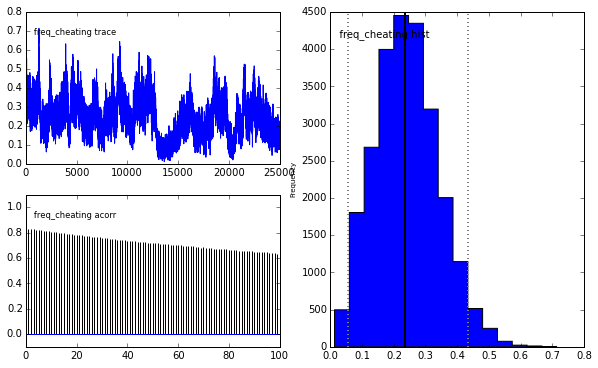

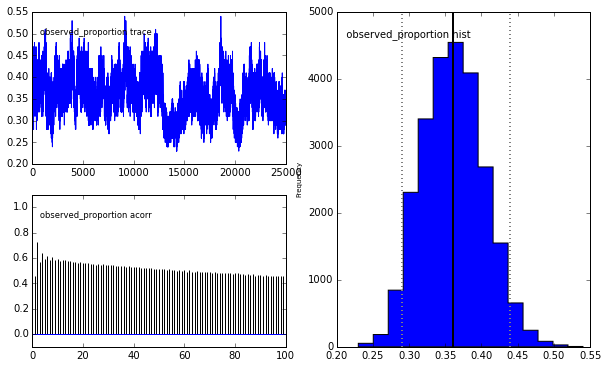

In [21]:
pm.Matplot.plot(mcmc);